## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

## Load Data

In [3]:
df=pd.read_csv('stock_market_june2025.csv')

In [9]:
df.head()

Date Ticker  Open Price  Close Price  High Price  Low Price  \
0  01-06-2025    SLH       34.92        34.53       35.22      34.38   
1  01-06-2025    WGB      206.50       208.45      210.51     205.12   
2  01-06-2025    ZIN      125.10       124.03      127.40     121.77   
3  01-06-2025    YPY      260.55       265.28      269.99     256.64   
4  01-06-2025    VKD      182.43       186.89      189.40     179.02   

   Volume Traded    Market Cap  PE Ratio  Dividend Yield    EPS  52 Week High  \
0        2966611  5.738136e+10     29.63            2.85   1.17         39.39   
1        1658738  5.274707e+10     13.03            2.73  16.00        227.38   
2       10709898  5.596949e+10     29.19            2.64   4.25        138.35   
3       14012358  7.964089e+10     19.92            1.29  13.32        317.57   
4       14758143  7.271437e+10     40.18            1.17   4.65        243.54   

   52 Week Low       Sector  
0        28.44  Industrials  
1       136.79       Energy  
2       100.69   Healthcare  
3       178.26  Industrials  
4       165.53   Technology

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1762 non-null   datetime64[ns]
 1   Ticker          1762 non-null   object        
 2   Open Price      1762 non-null   float64       
 3   Close Price     1762 non-null   float64       
 4   High Price      1762 non-null   float64       
 5   Low Price       1762 non-null   float64       
 6   Volume Traded   1762 non-null   int64         
 7   Market Cap      1762 non-null   float64       
 8   PE Ratio        1762 non-null   float64       
 9   Dividend Yield  1762 non-null   float64       
 10  EPS             1762 non-null   float64       
 11  52 Week High    1762 non-null   float64       
 12  52 Week Low     1762 non-null   float64       
 13  Sector          1762 non-null   object        
 14  Day             1762 non-null   int32         
dtypes: d

In [25]:
df.shape

(1762, 15)

In [29]:
df.isnull().sum()

Date              0
Ticker            0
Open Price        0
Close Price       0
High Price        0
Low Price         0
Volume Traded     0
Market Cap        0
PE Ratio          0
Dividend Yield    0
EPS               0
52 Week High      0
52 Week Low       0
Sector            0
Day               0
dtype: int64

df['Ticker'].nunique()

In [33]:
df['Sector'].unique()

array(['Industrials', 'Energy', 'Healthcare', 'Technology',
       'Consumer Staples', 'Materials', 'Financials',
       'Consumer Discretionary', 'Real Estate', 'Communication Services',
       'Utilities'], dtype=object)

In [25]:
df.describe(include='object')

Date Ticker     Sector
count         1762   1762       1762
unique          21   1691         11
top     04-06-2025    OUF  Materials
freq            98      2        170

In [31]:
df.describe()

Open Price  Close Price   High Price    Low Price  Volume Traded  \
count  1762.000000  1762.000000  1762.000000  1762.000000   1.762000e+03   
mean    157.500443   157.567054   160.423258   154.703956   8.075851e+06   
std      82.043046    82.227448    83.626559    80.647073   5.104890e+06   
min      15.020000    14.770000    15.120000    14.480000   5.007270e+05   
25%      86.592500    87.055000    88.487500    85.380000   4.268123e+06   
50%     155.675000   155.675000   158.820000   152.725000   7.911528e+06   
75%     227.207500   227.902500   231.627500   223.102500   1.160026e+07   
max     434.400000   447.430000   453.860000   431.500000   6.537774e+07   

         Market Cap     PE Ratio  Dividend Yield          EPS  52 Week High  \
count  1.762000e+03  1762.000000     1762.000000  1762.000000   1762.000000   
mean   6.520977e+10    23.143859        2.337327     7.663621    189.009381   
std    1.467168e+11     7.498239        1.124037     5.202411     99.082291   
min    1.290761e+09     8.020000        0.010000     0.470000     17.030000   
25%    2.717406e+10    16.997500        1.450000     3.745000    104.687500   
50%    5.135322e+10    22.620000        2.330000     6.790000    185.425000   
75%    7.623076e+10    28.977500        3.127500    10.350000    271.920000   
max    3.481112e+12    44.890000        5.000000    54.100000    571.570000   

       52 Week Low  
count  1762.000000  
mean    125.964574  
std      67.767279  
min      10.010000  
25%      66.662500  
50%     123.040000  
75%     179.825000  
max     345.530000

## Data cleaning and preprocessing

In [ ]:
#Convert Date column to datetime formate

In [13]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df

Date Ticker  Open Price  Close Price  High Price  Low Price  \
0    2025-06-01    SLH       34.92        34.53       35.22      34.38   
1    2025-06-01    WGB      206.50       208.45      210.51     205.12   
2    2025-06-01    ZIN      125.10       124.03      127.40     121.77   
3    2025-06-01    YPY      260.55       265.28      269.99     256.64   
4    2025-06-01    VKD      182.43       186.89      189.40     179.02   
...         ...    ...         ...          ...         ...        ...   
1757 2025-06-21    ZTL      196.09       199.18      200.08     195.42   
1758 2025-06-21    XOE      105.08       108.08      109.90     104.68   
1759 2025-06-21    EIE       18.88        18.46       18.95      18.23   
1760 2025-06-21    XYQ      154.55       158.57      160.85     152.37   
1761 2025-06-21    UAA      201.52       198.09      205.08     195.70   

      Volume Traded    Market Cap  PE Ratio  Dividend Yield    EPS  \
0           2966611  5.738136e+10     29.63            2.85   1.17   
1           1658738  5.274707e+10     13.03            2.73  16.00   
2          10709898  5.596949e+10     29.19            2.64   4.25   
3          14012358  7.964089e+10     19.92            1.29  13.32   
4          14758143  7.271437e+10     40.18            1.17   4.65   
...             ...           ...       ...             ...    ...   
1757        2749236  9.946662e+10     22.17            1.26   8.98   
1758        4582198  5.017450e+10     35.74            1.79   3.02   
1759        6997077  8.502518e+09     10.18            2.09   1.81   
1760        3549117  9.663899e+10     29.64            1.71   5.35   
1761        6484178  1.563642e+10     27.75            1.18   7.14   

      52 Week High  52 Week Low                  Sector  
0            39.39        28.44             Industrials  
1           227.38       136.79                  Energy  
2           138.35       100.69              Healthcare  
3           317.57       178.26             Industrials  
4           243.54       165.53              Technology  
...            ...          ...                     ...  
1757        232.20       186.46              Technology  
1758        129.28        75.71              Technology  
1759         24.50        14.64                  Energy  
1760        199.23       149.78  Communication Services  
1761        258.92       184.92               Materials  

[1762 rows x 14 columns]

In [ ]:
# Introducing new column as Day

In [15]:
df['Day']=df['Date'].dt.day

In [17]:
df

Date Ticker  Open Price  Close Price  High Price  Low Price  \
0    2025-06-01    SLH       34.92        34.53       35.22      34.38   
1    2025-06-01    WGB      206.50       208.45      210.51     205.12   
2    2025-06-01    ZIN      125.10       124.03      127.40     121.77   
3    2025-06-01    YPY      260.55       265.28      269.99     256.64   
4    2025-06-01    VKD      182.43       186.89      189.40     179.02   
...         ...    ...         ...          ...         ...        ...   
1757 2025-06-21    ZTL      196.09       199.18      200.08     195.42   
1758 2025-06-21    XOE      105.08       108.08      109.90     104.68   
1759 2025-06-21    EIE       18.88        18.46       18.95      18.23   
1760 2025-06-21    XYQ      154.55       158.57      160.85     152.37   
1761 2025-06-21    UAA      201.52       198.09      205.08     195.70   

      Volume Traded    Market Cap  PE Ratio  Dividend Yield    EPS  \
0           2966611  5.738136e+10     29.63            2.85   1.17   
1           1658738  5.274707e+10     13.03            2.73  16.00   
2          10709898  5.596949e+10     29.19            2.64   4.25   
3          14012358  7.964089e+10     19.92            1.29  13.32   
4          14758143  7.271437e+10     40.18            1.17   4.65   
...             ...           ...       ...             ...    ...   
1757        2749236  9.946662e+10     22.17            1.26   8.98   
1758        4582198  5.017450e+10     35.74            1.79   3.02   
1759        6997077  8.502518e+09     10.18            2.09   1.81   
1760        3549117  9.663899e+10     29.64            1.71   5.35   
1761        6484178  1.563642e+10     27.75            1.18   7.14   

      52 Week High  52 Week Low                  Sector  Day  
0            39.39        28.44             Industrials    1  
1           227.38       136.79                  Energy    1  
2           138.35       100.69              Healthcare    1  
3           317.57       178.26             Industrials    1  
4           243.54       165.53              Technology    1  
...            ...          ...                     ...  ...  
1757        232.20       186.46              Technology   21  
1758        129.28        75.71              Technology   21  
1759         24.50        14.64                  Energy   21  
1760        199.23       149.78  Communication Services   21  
1761        258.92       184.92               Materials   21  

[1762 rows x 15 columns]

## EDA

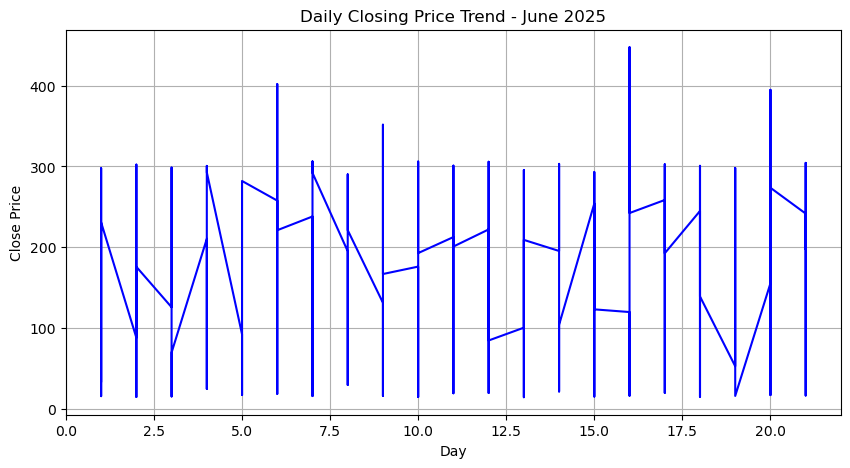

In [37]:
# Daily closing price trend
plt.figure(figsize=(10,5))
plt.plot(df['Day'], df['Close Price'], color='blue')
plt.title('Daily Closing Price Trend - June 2025')
plt.xlabel('Day')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

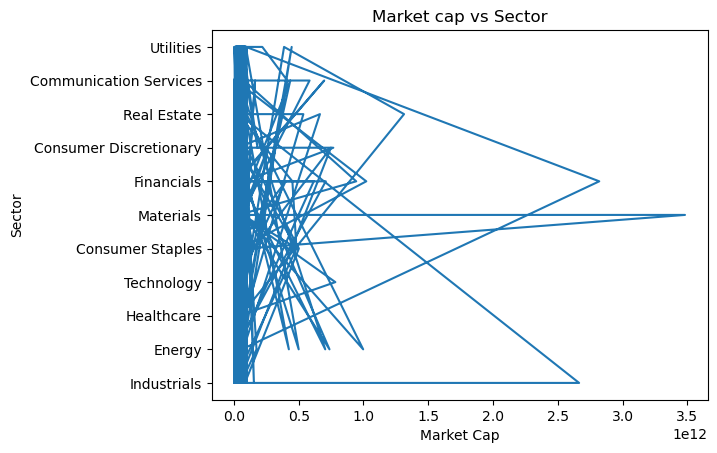

In [39]:
plt.plot(df['Market Cap'],df['Sector'])
plt.title('Market cap vs Sector')
plt.xlabel('Market Cap')
plt.ylabel('Sector')
plt.show()

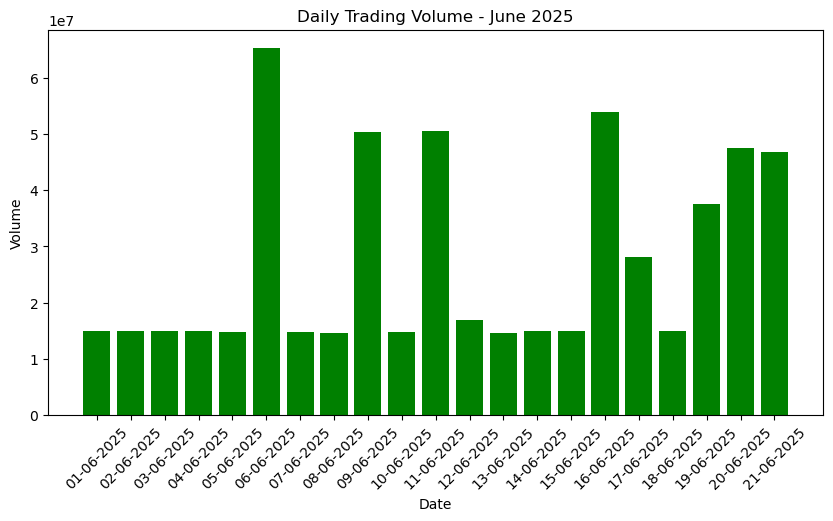

In [9]:
plt.figure(figsize=(10,5))
plt.bar(df['Date'], df['Volume Traded'], color='green')
plt.title('Daily Trading Volume - June 2025')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.show()


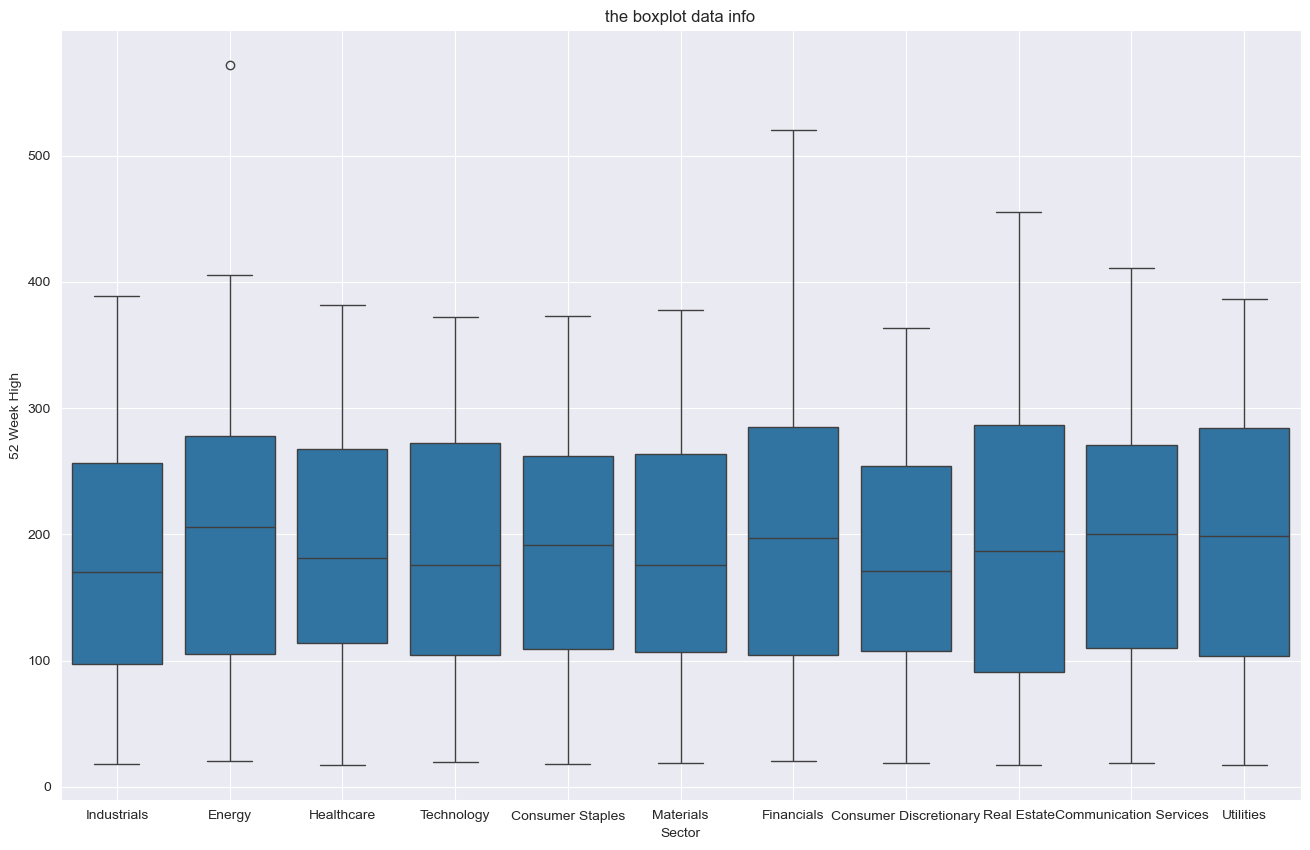

In [47]:
plt.figure(figsize=(16,10))
sns.set_style('darkgrid')
sns.boxplot(x='Sector',y='52 Week High',data=df)
plt.title('the boxplot data info')
plt.grid(True)
plt.show()

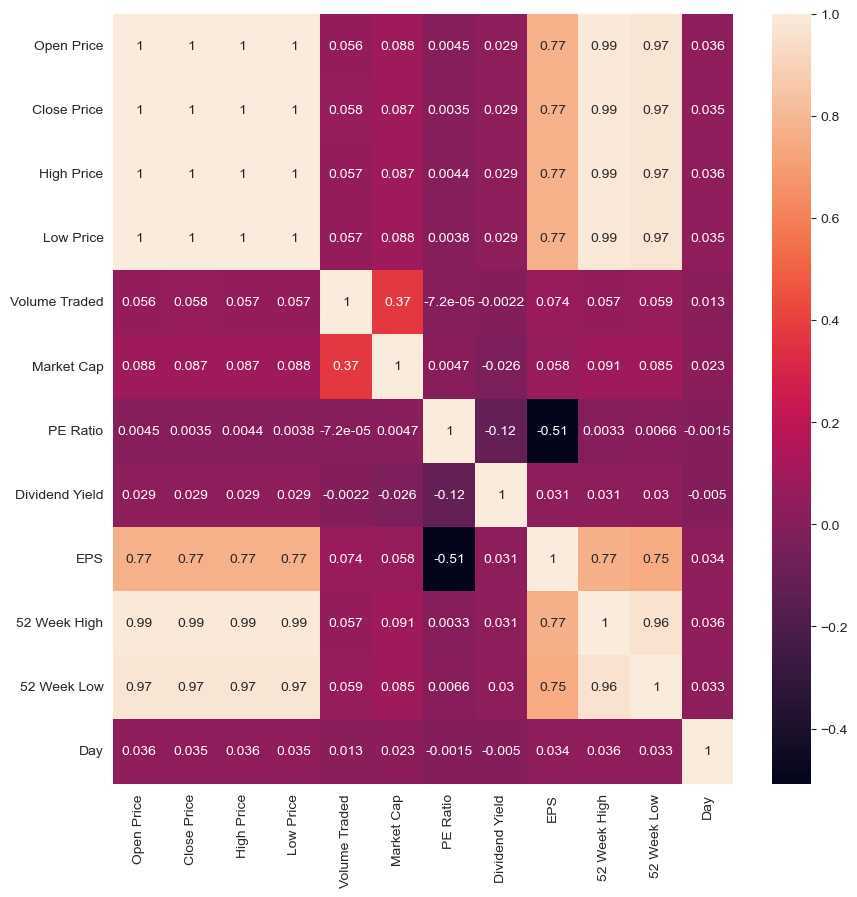

In [66]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [ ]:
# Barplot for numerical column vs Sector

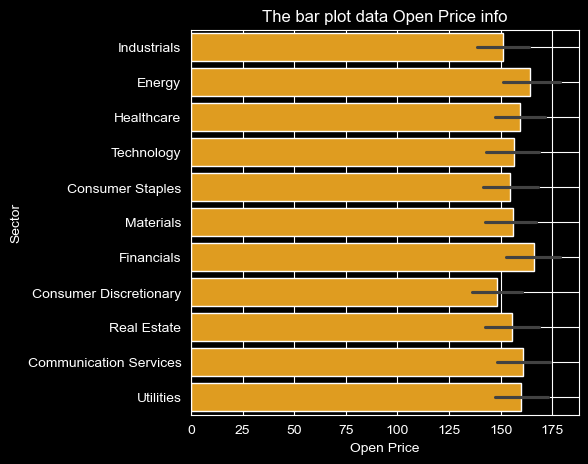

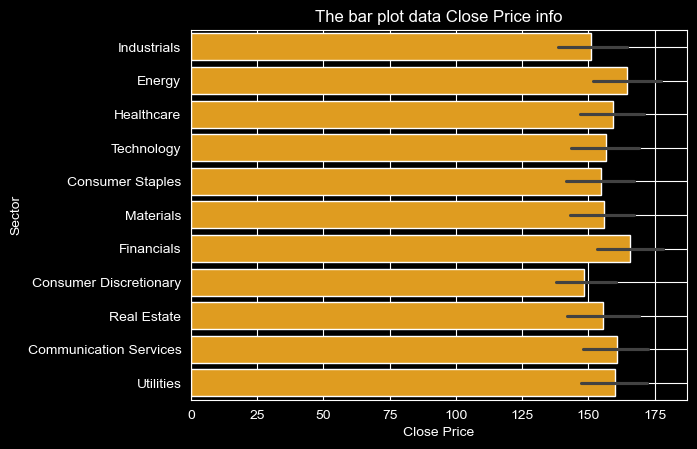

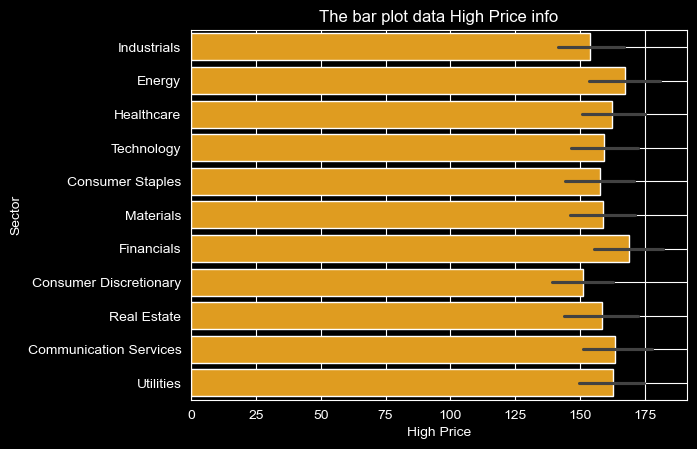

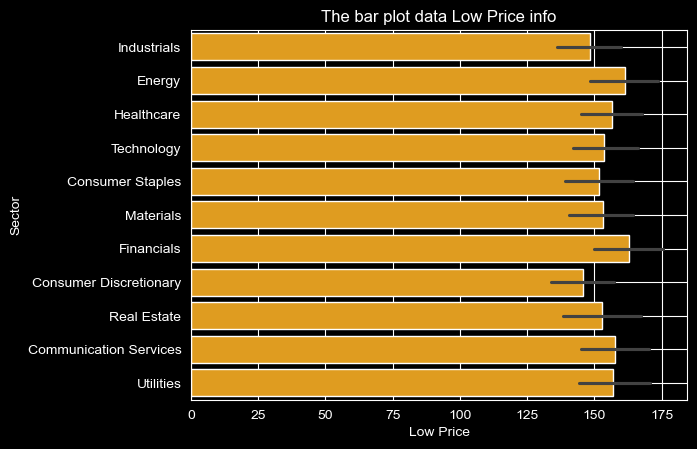

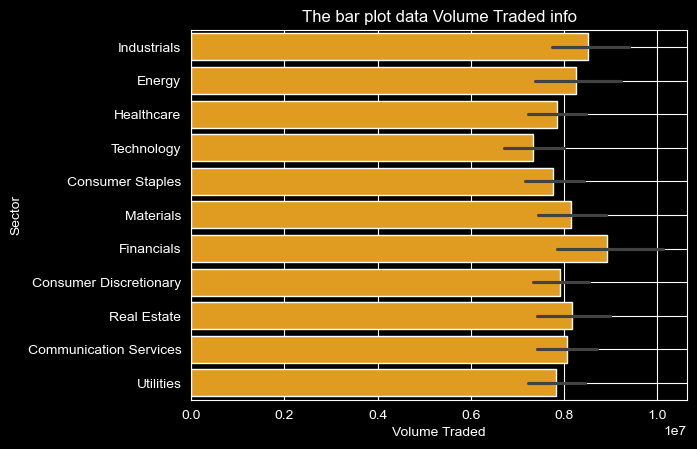

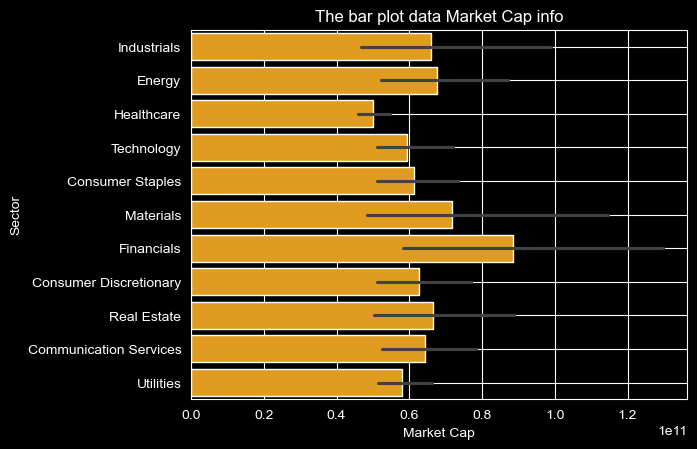

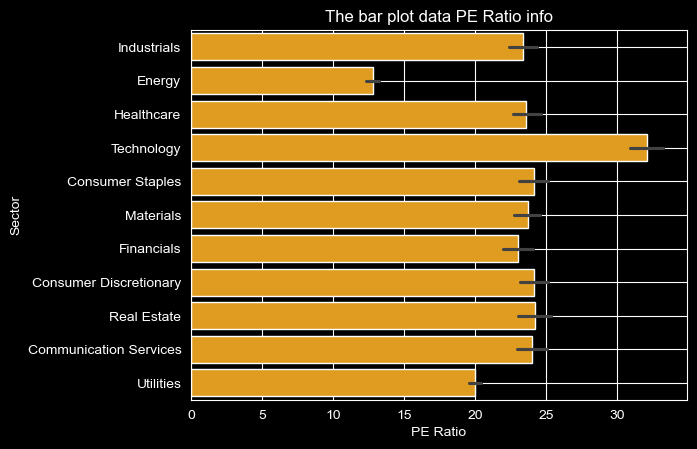

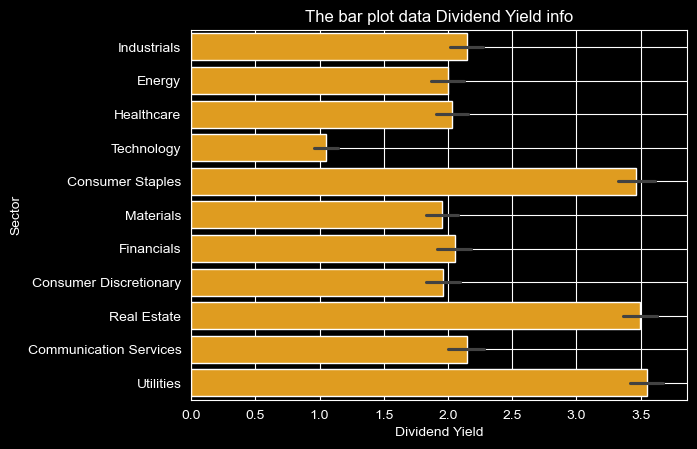

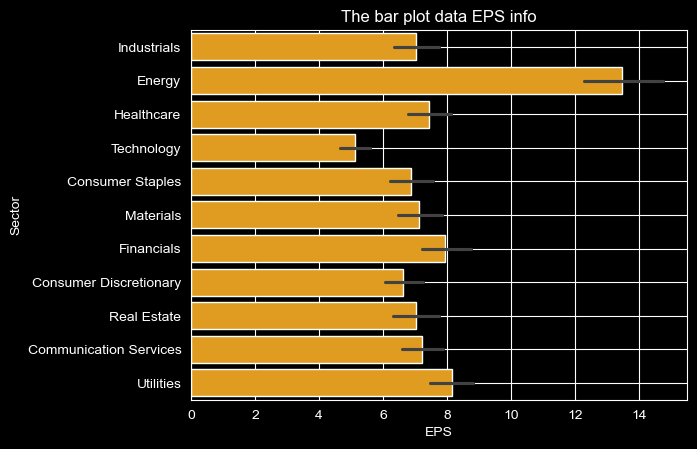

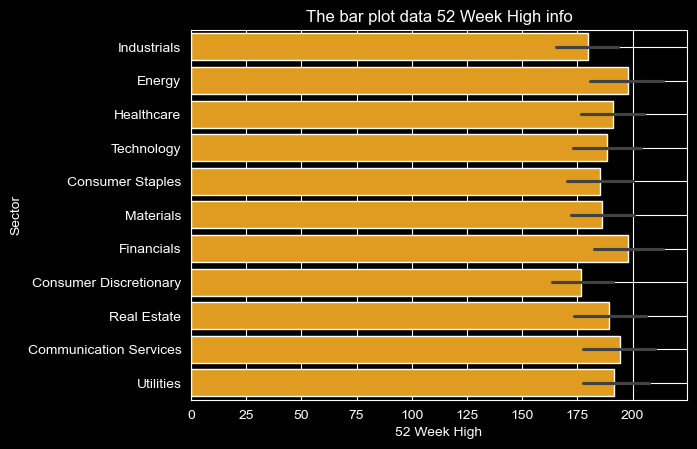

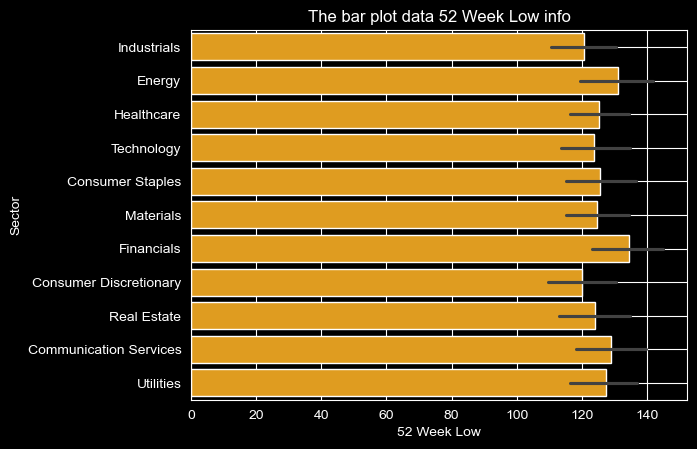

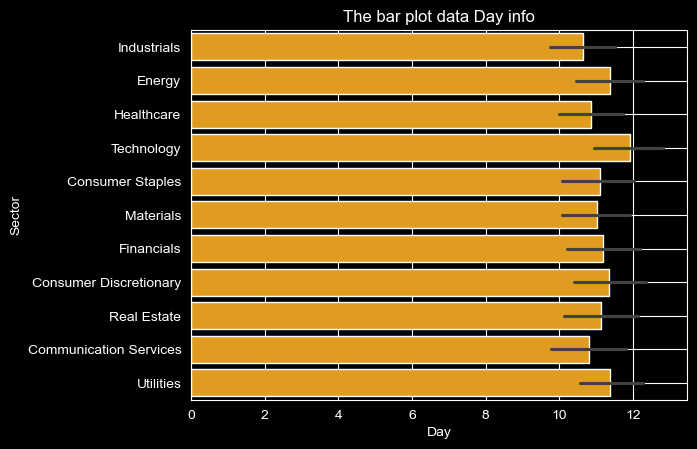

In [102]:
numerical_col=df.select_dtypes(include=np.number).columns
plt.figure(figsize=(5,5))
plt.style.use('dark_background')
for col in numerical_col:
    sns.barplot(x=col,y='Sector',data=df,color='orange')
    plt.title(f'The bar plot data {col} info')
    plt.grid(True)
    plt.show()

<Figure size 1000x1000 with 0 Axes>

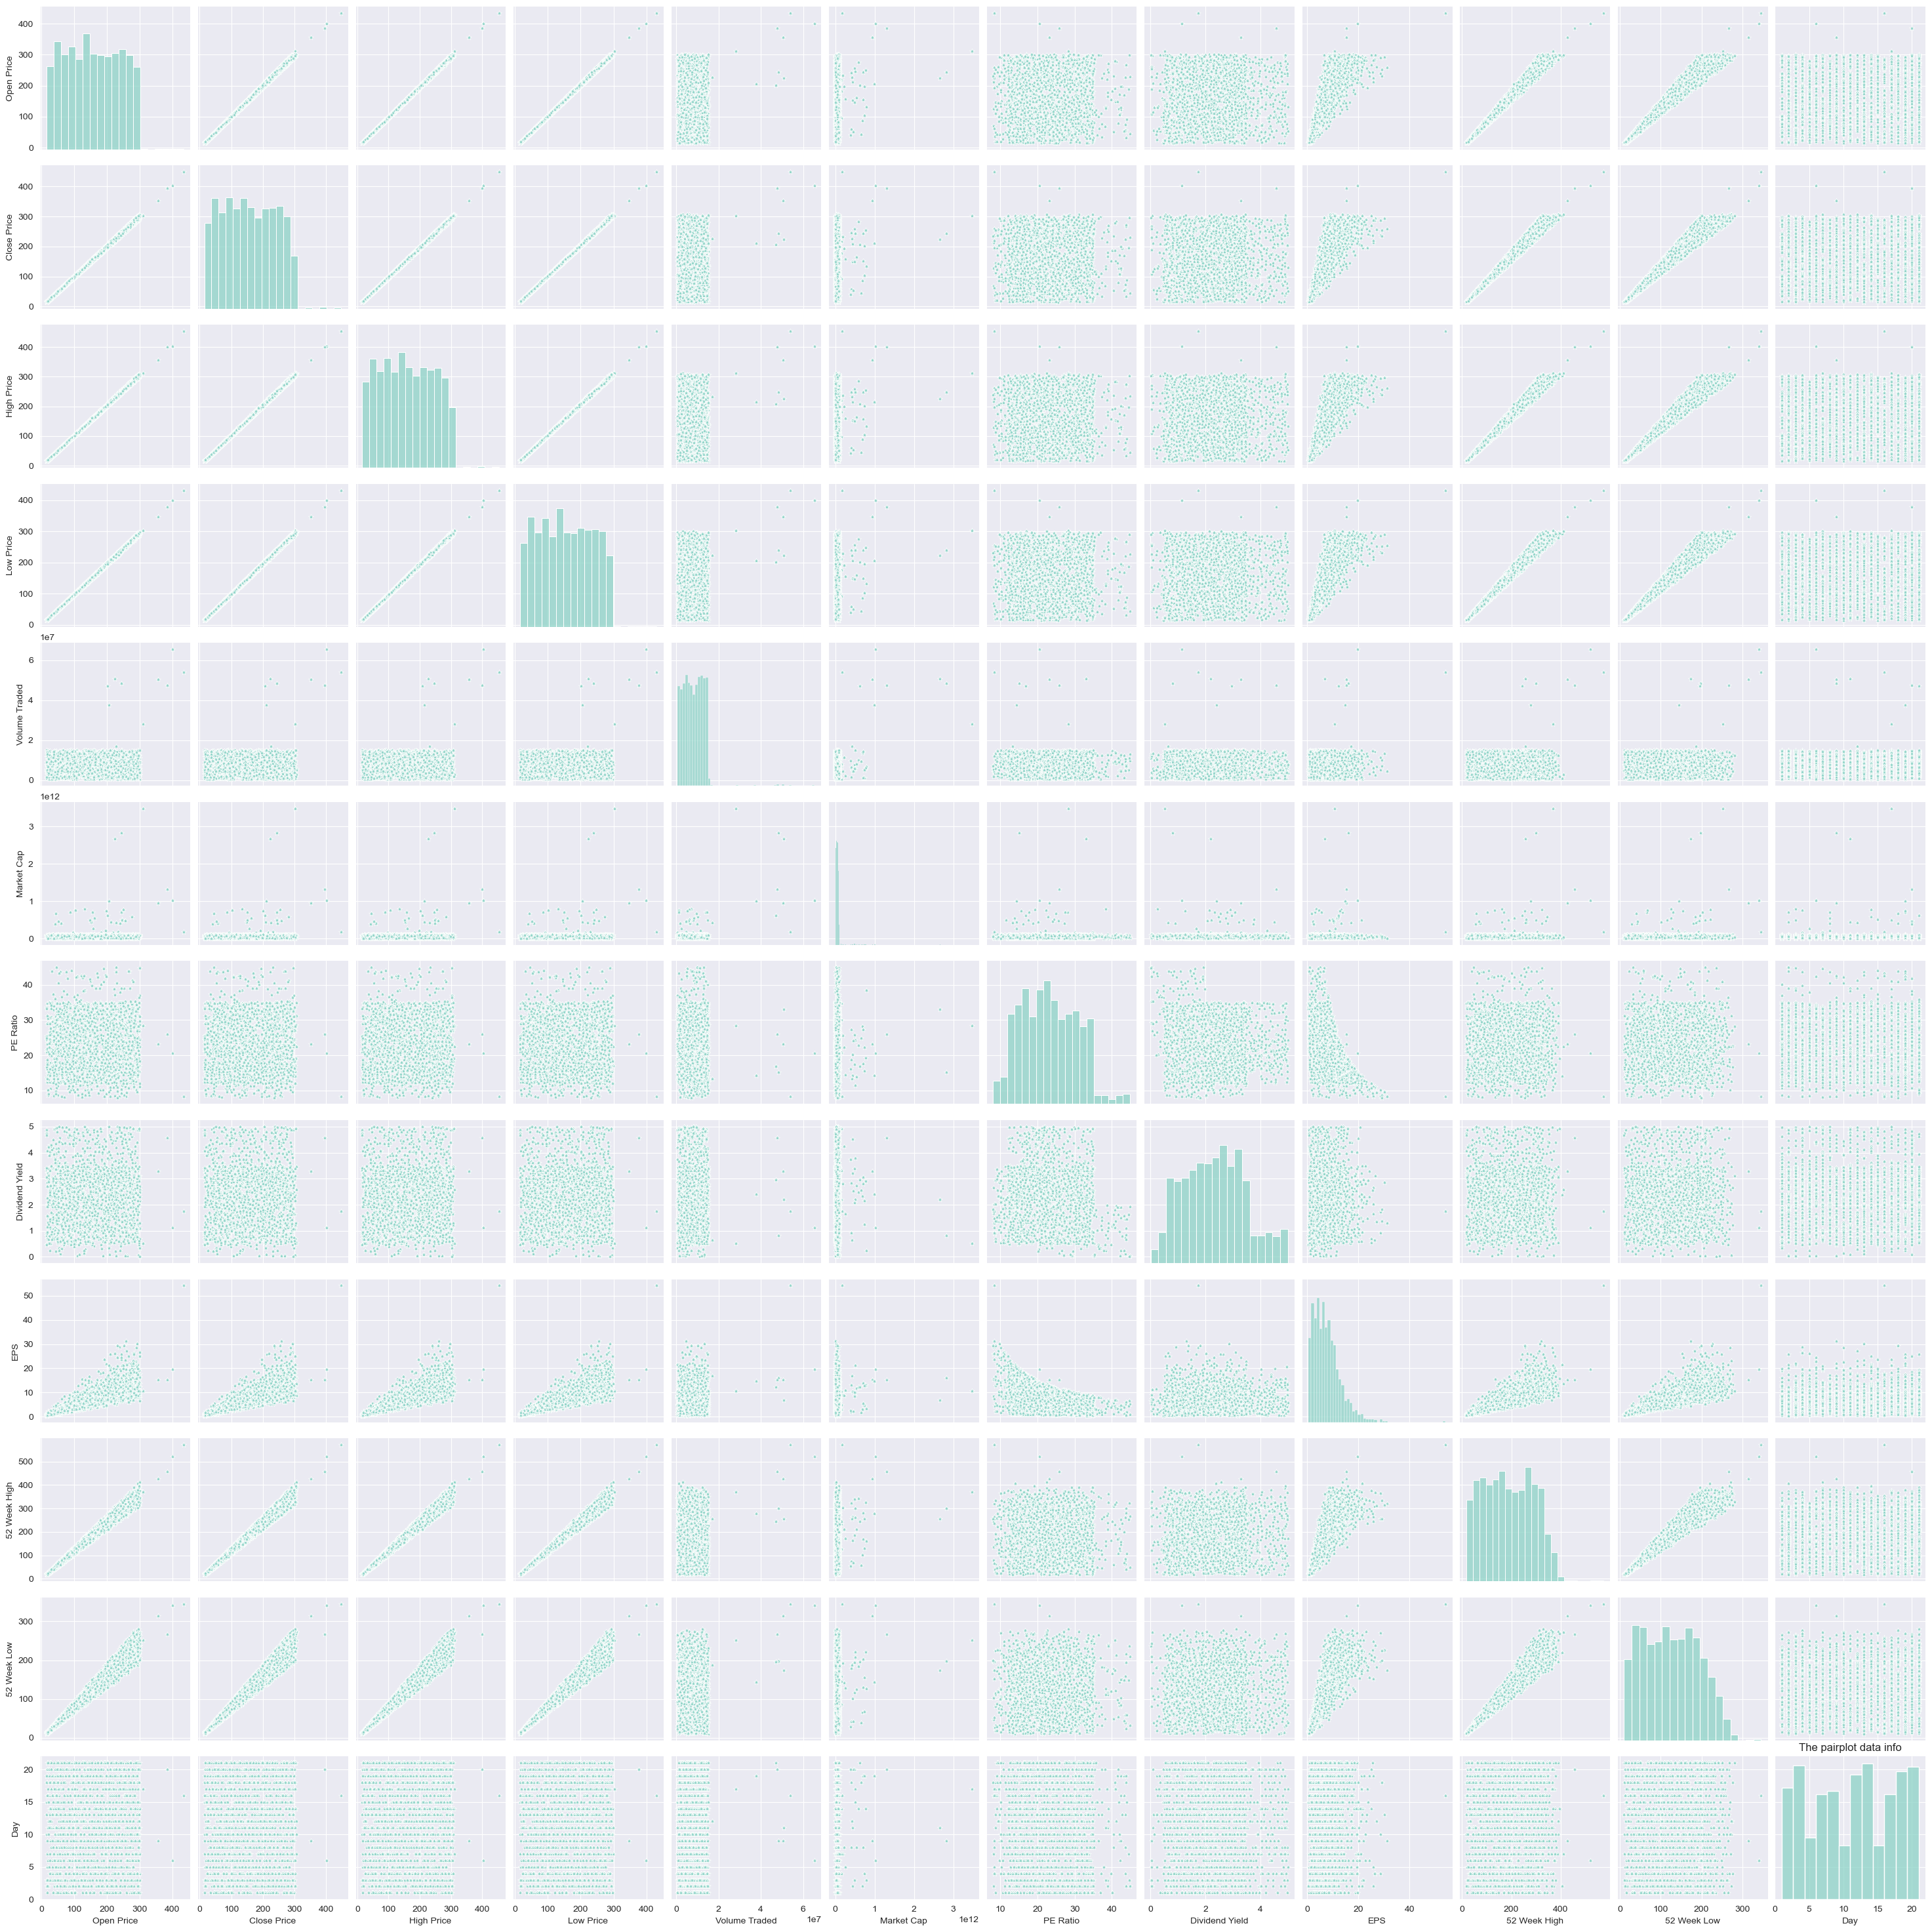

In [104]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.pairplot(data=df,markers='*')
plt.title('The pairplot data info')
plt.grid(True)
plt.show()

In [ ]:
# Plot histograms for OHCL

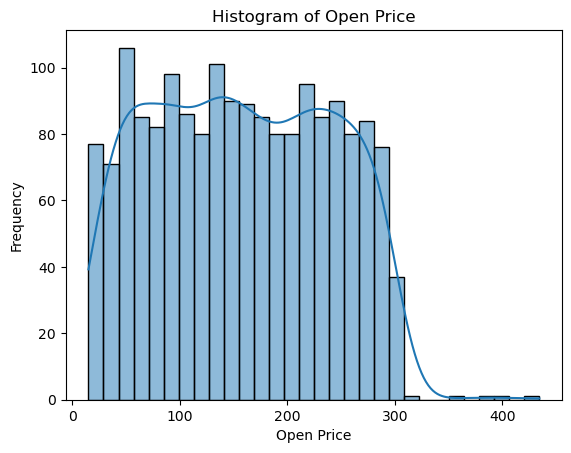

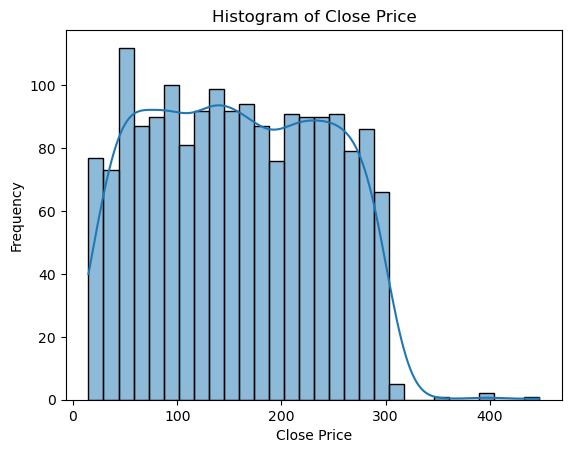

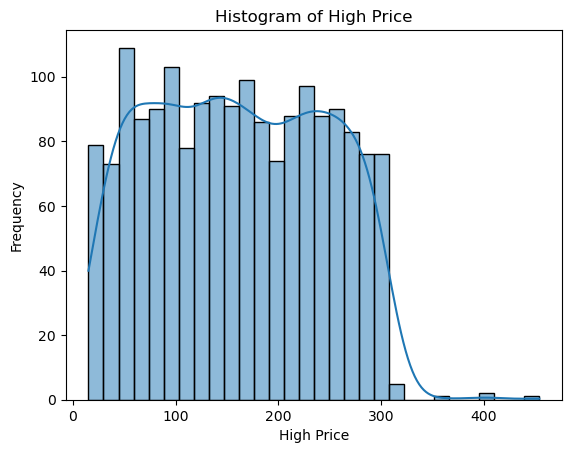

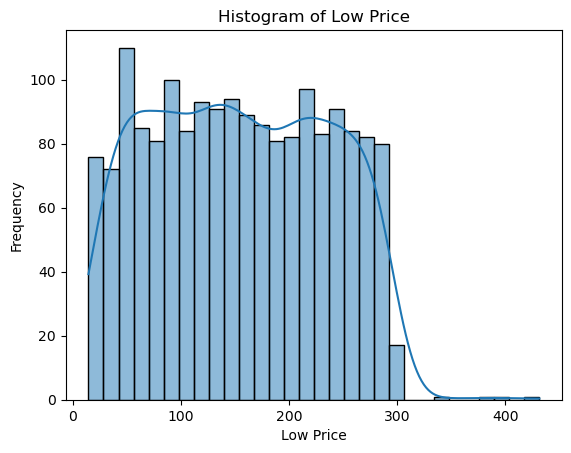

In [17]:
selected_cols = ['Open Price', 'Close Price', 'High Price', 'Low Price']
for col in selected_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Box Plot for Volume Traded to identify outliers

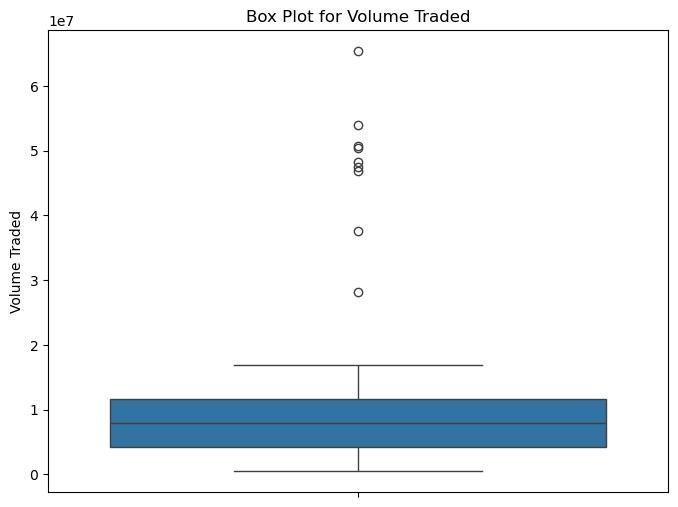

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='Volume Traded', data=df)
plt.title('Box Plot for Volume Traded')
plt.show()

In [33]:
# What is the EPS (Earnings Per Share) For each Market within each industry sector

In [35]:
df_top_tickers = df[['Ticker','EPS']].sort_values('EPS',ascending=False).head(5)
df_top_tickers

Ticker    EPS
1303  BRK.B  54.10
683     WGK  31.10
1025    PHM  30.26
1421    HQZ  29.25
1448    QYG  29.24

In [37]:
df_grouped_top_tickers = df.groupby('Ticker')['EPS'].sum().sort_values(ascending=False).head(5)
df_grouped_top_tickers

Ticker
BRK.B    54.10
CEA      33.14
TTT      32.04
WGK      31.10
PHM      30.26
Name: EPS, dtype: float64

In [77]:
df_grouped_industries = df.groupby('Sector')['EPS'].mean().sort_values(ascending=False)
df_grouped_industries

Sector
Energy                    13.465864
Utilities                  8.162424
Financials                 7.945476
Healthcare                 7.432036
Communication Services     7.231688
Materials                  7.115706
Industrials                7.042229
Real Estate                7.016490
Consumer Staples           6.881379
Consumer Discretionary     6.634528
Technology                 5.125806
Name: EPS, dtype: float64

In [ ]:
# What is the PE Ratio For each Market within each industry sector

In [89]:
PE_Ratio_grouped_industries = df.groupby('Sector')['PE Ratio'].mean().sort_values(ascending=False)
PE_Ratio_grouped_industries

Sector
Technology                32.095742
Real Estate               24.210000
Consumer Discretionary    24.175912
Consumer Staples          24.174759
Communication Services    24.015195
Materials                 23.714882
Healthcare                23.600060
Industrials               23.367831
Financials                23.058750
Utilities                 19.996909
Energy                    12.815556
Name: PE Ratio, dtype: float64

In [91]:
combined_df = pd.DataFrame({
    'EPS': df_grouped_industries,
    'PE Ratio': PE_Ratio_grouped_industries
}).reset_index()

In [93]:
combined_df

Sector        EPS   PE Ratio
0   Communication Services   7.231688  24.015195
1   Consumer Discretionary   6.634528  24.175912
2         Consumer Staples   6.881379  24.174759
3                   Energy  13.465864  12.815556
4               Financials   7.945476  23.058750
5               Healthcare   7.432036  23.600060
6              Industrials   7.042229  23.367831
7                Materials   7.115706  23.714882
8              Real Estate   7.016490  24.210000
9               Technology   5.125806  32.095742
10               Utilities   8.162424  19.996909

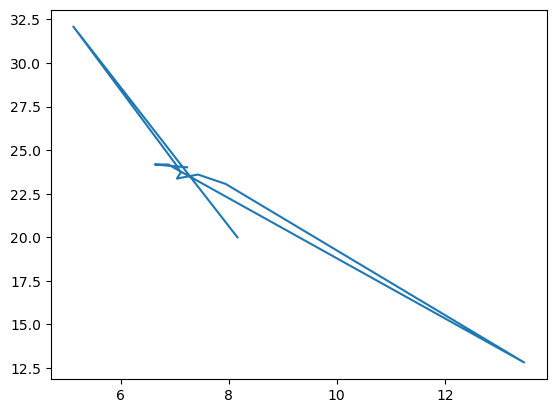

In [95]:
plt.plot(combined_df['EPS'],combined_df['PE Ratio'])

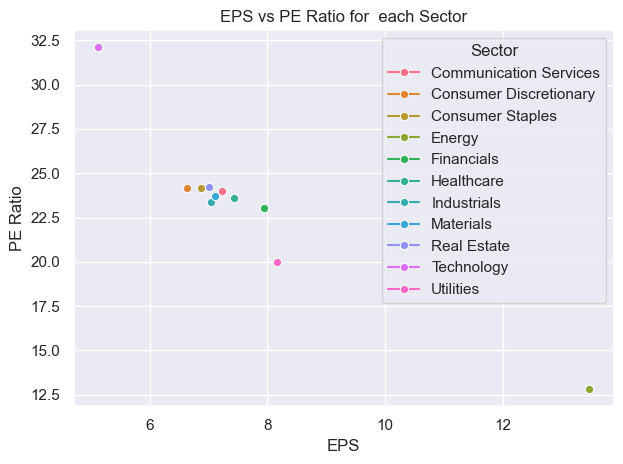

In [105]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='EPS',y='PE Ratio',hue='Sector',data=combined_df, marker='o')
plt.title('EPS vs PE Ratio for  each Sector')
plt.grid(True)
plt.tight_layout()
plt.show()

##  Simple regression model to predict the 'Close Price' of a stock

In [170]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score,precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler=StandardScaler()
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [127]:
x=df[['Open Price', 'High Price', 'Low Price', 'Volume Traded']]
y= df['Close Price']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [131]:
X_train

Open Price  High Price  Low Price  Volume Traded
1403      128.61      129.08     124.29        5021570
721       273.53      276.72     267.44        7654402
518       161.36      162.59     159.92       12134557
199        18.75       19.03      18.55       11638951
1671      201.92      206.02     201.66       11834380
...          ...         ...        ...            ...
1130      100.27      101.14      98.30        9795727
1294       99.44      100.54      97.88        9554706
860       240.79      242.66     234.33        7159016
1459       49.03       49.27      47.83        7912056
1126      145.00      150.04     144.69       10310571

[1409 rows x 4 columns]

In [ ]:
# Model training

In [177]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict on the test set

In [179]:
y_predict = model.predict(X_test)
y_predict

array([223.39804108,  71.4888556 , 174.98224747, 348.70882888,
       141.98190797, 175.19141992, 245.67273122,  75.11207463,
       208.85241759, 179.7678062 , 279.66932319, 209.66219841,
        33.97541129, 107.63741745, 192.9199303 ,  24.3657934 ,
        35.34998118, 156.4870472 , 294.37882617,  74.31185372,
       239.39654188, 267.32952618, 149.78423229, 212.96607154,
       212.48755023,  64.84304772,  88.13950647, 299.57897082,
        64.63550344, 167.4277305 , 273.74486513, 276.05219645,
       215.68209519,  18.95651315, 168.88036211, 130.29300863,
       258.64244094,  76.92808006, 263.86324553, 129.17689758,
        99.80452738, 212.7131955 , 110.63752506, 232.53941018,
        62.38880233, 215.1596173 , 291.82375378, 269.19642187,
       183.87886638, 205.18764086, 304.31895725,  33.33959405,
       290.88013225, 168.56713893, 201.61257829, 107.34131061,
       294.8901442 , 217.26403927, 272.56423831,  25.06496894,
       149.83538595, 290.19477758, 231.23384254, 240.65

In [193]:
# Evaluate model performance using R^2 score, Mean Squared Err, Mean Absolute Error

In [201]:
mae = mean_absolute_error(y_test,y_predict)
mse = mean_squared_error(y_test,y_predict)
score = r2_score(y_test,y_predict)

In [203]:
print('the mean absolute:',mae)
print('The mean squared:',mse)
print('The score value:',score)

the mean absolute: 0.9345709143758161
The mean squared: 1.6742761225151166
The score value: 0.9997657694330033


In [ ]:
#  Plotting the predicted vs actual values for the Close Price

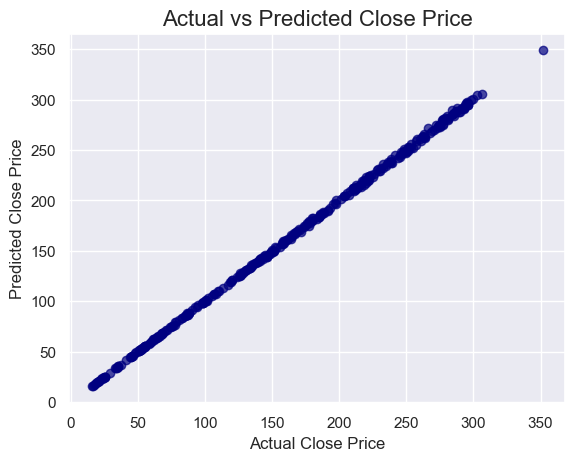

In [231]:
plt.scatter(y_test, y_pred, alpha=0.7, color='navy')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Price' , fontsize=16)
plt.show()

## Simple regression model to predict the 'Market Cap' of a stock

In [11]:
X = df[['Open Price','Close Price','High Price','Low Price','Volume Traded']]
y = df['Market Cap']


In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [15]:
model = LinearRegression()
model.fit(x_test,y_test)

LinearRegression()

In [17]:
y_pred = model.predict(x_test)
y_pred

array([ 3.98920329e+09,  7.04287785e+10,  1.31130818e+11,  7.90887759e+11,
        2.43482168e+10,  1.13122089e+11,  8.78700013e+10,  1.53194332e+10,
        2.23207393e+10,  5.49873202e+10,  1.82511320e+11,  1.19828676e+10,
       -1.46363436e+10,  7.72048896e+10,  1.62177364e+11,  4.96004681e+10,
        5.88727181e+10,  9.85254049e+10,  2.53511023e+09,  1.71149714e+10,
        1.02278320e+11,  1.16851111e+11,  1.05663429e+11,  1.21244869e+11,
        7.40794992e+10,  5.67843084e+10,  8.09980946e+10,  4.96479628e+10,
       -4.13425230e+10,  5.54862199e+10,  7.55653494e+10,  6.11002096e+10,
        1.30369180e+11, -4.52380931e+10,  1.08077672e+09, -6.44444374e+10,
       -4.43545399e+10,  6.53312425e+10, -3.08041758e+10,  2.44571457e+10,
        1.75172429e+09,  6.66520483e+10, -4.07187551e+09,  9.50342592e+10,
        1.14924032e+11,  7.74693468e+10,  1.16842111e+11,  2.73302981e+10,
        1.80887674e+11,  1.07356735e+11,  4.57590293e+11,  6.85488254e+10,
        1.82812567e+11,  

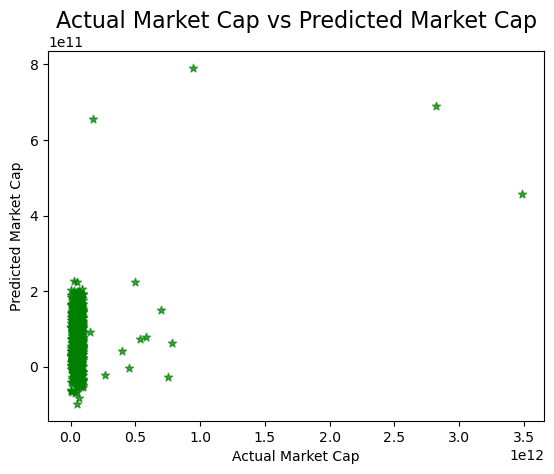

In [25]:
plt.scatter(y_test, y_pred, alpha=0.7, color='green', marker='*')
plt.xlabel('Actual Market Cap')
plt.ylabel('Predicted Market Cap')
plt.title('Actual Market Cap vs Predicted Market Cap' , fontsize=16)
plt.show()

## Logistic Regression
## Decision Tree
## Random Forest
## SVM (Support Vector Machine)

In [ ]:
#  Create a binary target variable

In [27]:
df['Target'] = (df['Close Price'] > df['Open Price']).astype(int)

In [29]:
# Drop unnecessary columns

In [31]:
df_model = df.drop(columns=['Date', 'Ticker'])  
df_model = pd.get_dummies(df_model, columns=['Sector'], drop_first=True)  

In [ ]:
# check correlation between features

In [33]:
correlation_matrix = df_model.corr()

In [35]:
correlation_matrix

Open Price  Close Price  High Price  Low Price  \
Open Price                       1.000000     0.999302    0.999724   0.999708   
Close Price                      0.999302     1.000000    0.999709   0.999710   
High Price                       0.999724     0.999709    1.000000   0.999690   
Low Price                        0.999708     0.999710    0.999690   1.000000   
Volume Traded                    0.056119     0.057744    0.056667   0.056573   
Market Cap                       0.087781     0.087199    0.086821   0.087909   
PE Ratio                         0.004454     0.003544    0.004426   0.003759   
Dividend Yield                   0.028851     0.029331    0.029216   0.028917   
EPS                              0.773734     0.774809    0.774098   0.774512   
52 Week High                     0.987556     0.988206    0.987943   0.987840   
52 Week Low                      0.971994     0.972473    0.972270   0.972308   
Target                           0.014850     0.043435    0.028278   0.029331   
Sector_Consumer Discretionary   -0.035184    -0.034667   -0.034651  -0.035087   
Sector_Consumer Staples         -0.011296    -0.009975   -0.010341  -0.010617   
Sector_Energy                    0.026577     0.026935    0.026370   0.026742   
Sector_Financials                0.033289     0.032822    0.033049   0.032866   
Sector_Healthcare                0.007832     0.006624    0.006929   0.007549   
Sector_Industrials              -0.024647    -0.025273   -0.024698  -0.024940   
Sector_Materials                -0.006769    -0.007202   -0.006555  -0.006586   
Sector_Real Estate              -0.006952    -0.007909   -0.007386  -0.007722   
Sector_Technology               -0.004075    -0.004100   -0.004372  -0.004182   
Sector_Utilities                 0.008447     0.009552    0.009008   0.008789   

                               Volume Traded  Market Cap  PE Ratio  \
Open Price                          0.056119    0.087781  0.004454   
Close Price                         0.057744    0.087199  0.003544   
High Price                          0.056667    0.086821  0.004426   
Low Price                           0.056573    0.087909  0.003759   
Volume Traded                       1.000000    0.370117 -0.000072   
Market Cap                          0.370117    1.000000  0.004658   
PE Ratio                           -0.000072    0.004658  1.000000   
Dividend Yield                     -0.002154   -0.025968 -0.115248   
EPS                                 0.073605    0.057701 -0.507784   
52 Week High                        0.057281    0.090919  0.003303   
52 Week Low                         0.058942    0.085419  0.006644   
Target                              0.018355   -0.000496 -0.030239   
Sector_Consumer Discretionary      -0.009709   -0.005190  0.043361   
Sector_Consumer Staples            -0.018488   -0.007805  0.041182   
Sector_Energy                       0.011001    0.005174 -0.438420   
Sector_Financials                   0.053620    0.051290 -0.003686   
Sector_Healthcare                  -0.014760   -0.033419  0.019692   
Sector_Industrials                  0.027325    0.001619  0.009636   
Sector_Materials                    0.004222    0.014707  0.024893   
Sector_Real Estate                  0.005713    0.002558  0.043543   
Sector_Technology                  -0.045086   -0.012520  0.370882   
Sector_Utilities                   -0.015439   -0.015959 -0.134941   

                               Dividend Yield       EPS  52 Week High  ...  \
Open Price                           0.028851  0.773734      0.987556  ...   
Close Price                          0.029331  0.774809      0.988206  ...   
High Price                           0.029216  0.774098      0.987943  ...   
Low Price                            0.028917  0.774512      0.987840  ...   
Volume Traded                       -0.002154  0.073605      0.057281  ...   
Market Cap                          -0.025968  0.057701      0.090919  ...   
PE Ratio  

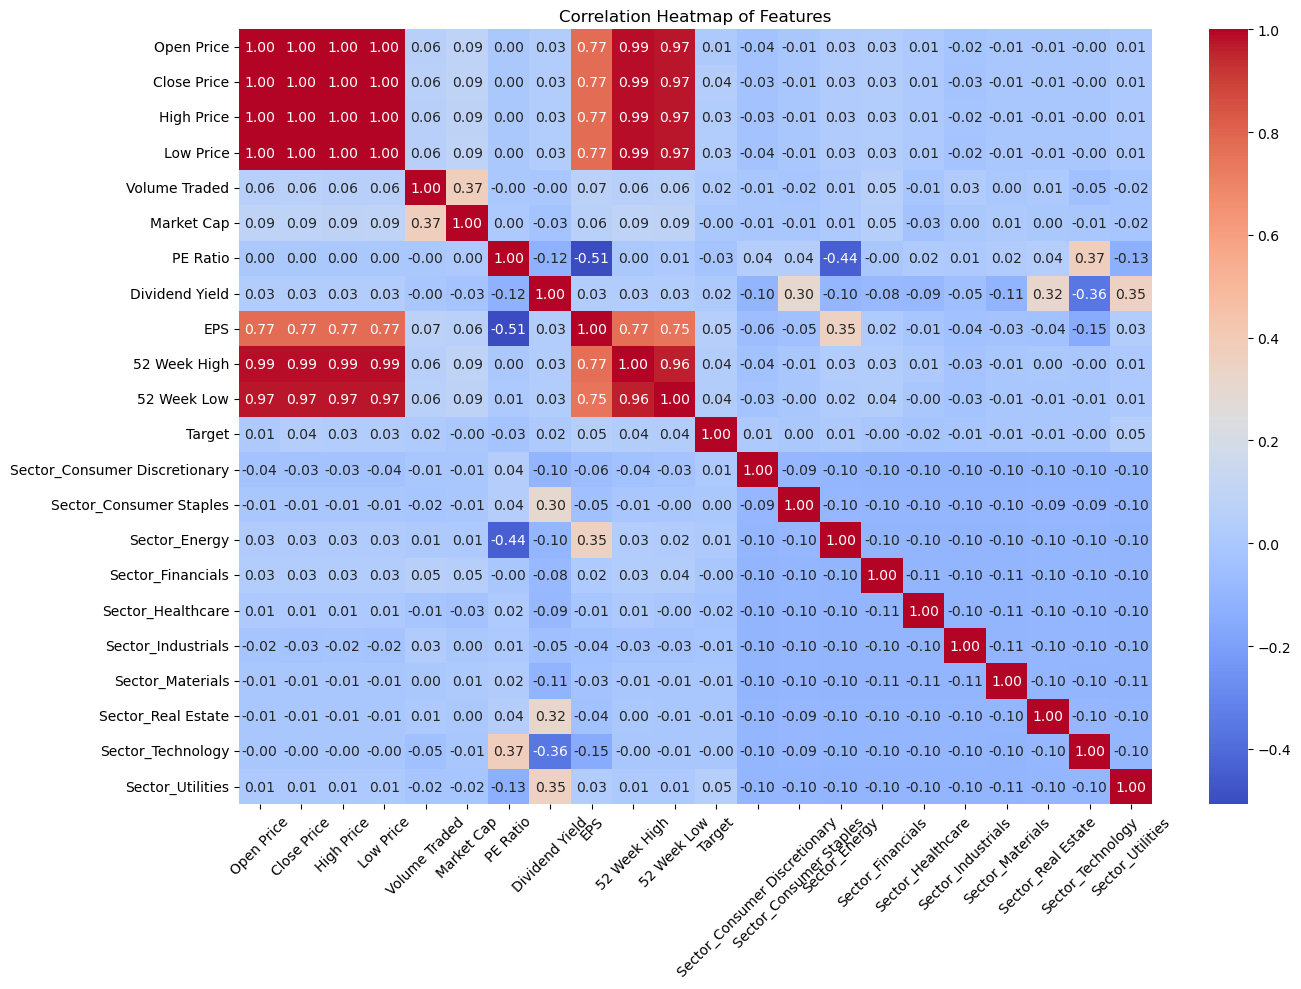

In [37]:
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap of Features")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [53]:
X = df_model.drop(columns=['Target', 'Close Price']) 
y = df_model['Target']

In [55]:
# # Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [57]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [59]:
# Model training
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

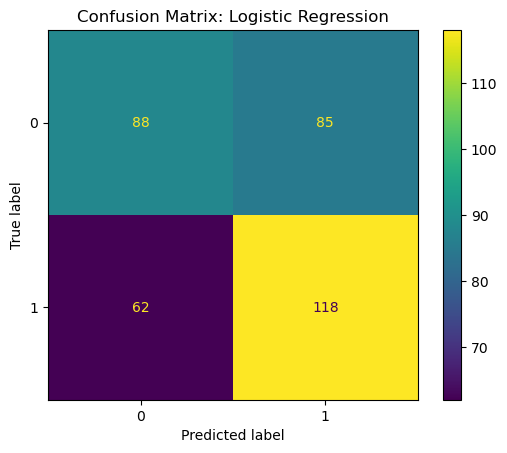

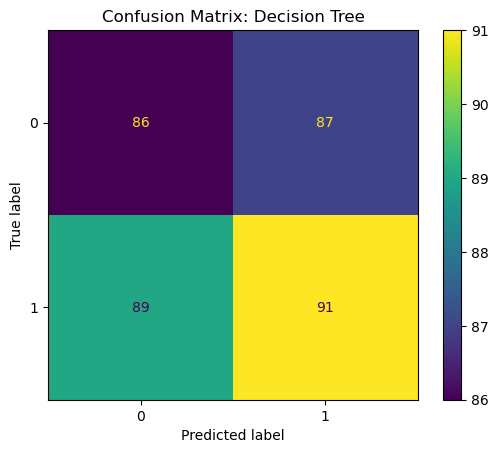

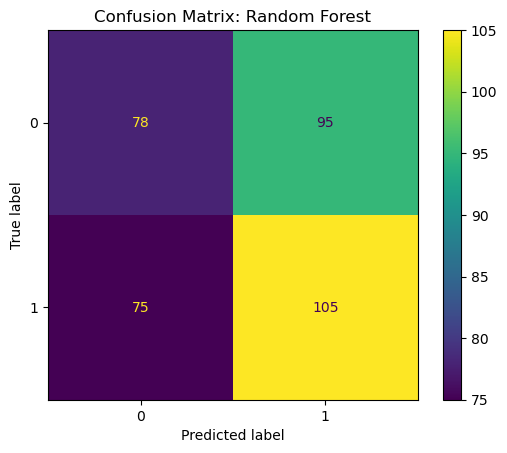

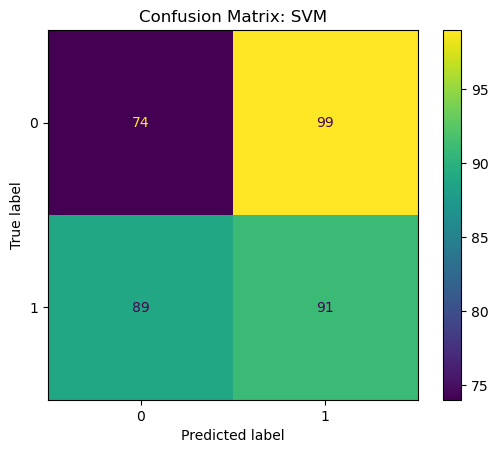

In [172]:
# Model Evaluation
model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    model_results[name] = {
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds),
        "Recall": recall_score(y_test, preds),
        "F1 Score": f1_score(y_test, preds)
    }
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

In [174]:
results_df = pd.DataFrame(model_results).T
results_df.sort_values(by="F1 Score", ascending=False)

Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.583569   0.581281  0.655556  0.616188
Random Forest        0.518414   0.525000  0.583333  0.552632
Decision Tree        0.501416   0.511236  0.505556  0.508380
SVM                  0.467422   0.478947  0.505556  0.491892

In [176]:
new_data=results_df.reset_index()

In [178]:
import warnings 
warnings.filterwarnings('ignore')

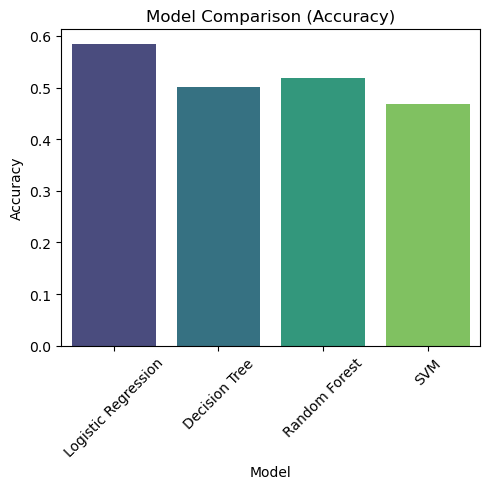

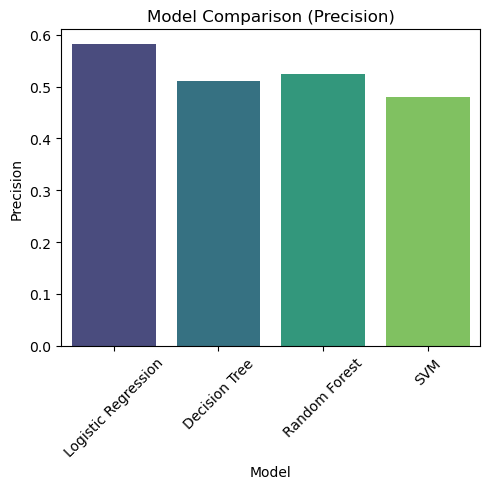

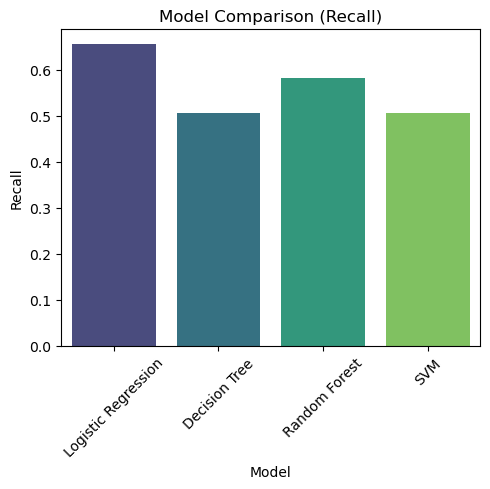

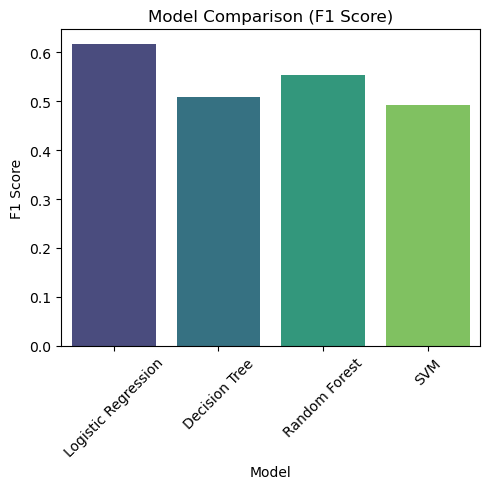

In [180]:
list = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for col in list:
    plt.figure(figsize=(5, 5))
    sns.barplot(data=new_data, x="index", y=col, palette="viridis")
    plt.title(f"Model Comparison ({col})")
    plt.ylabel(col)
    plt.xlabel("Model")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()